In [3]:
# We are about to make dumbest possible neural net. It will contain 1 neuron and no bias.
# We will be optimizing grayscale pixel
# Basically, this is more visual example for the simplest possible neural network from the book "grokking deep learning"

In [5]:
!pip install pillow


     |████████████████████████████████| 2.1 MB 646 kB/s eta 0:00:01


In [7]:
import numpy as np
from PIL import Image

In [8]:
# this is the target pixel. it is light gray
target_pix = np.array([[220]])

# let's visualize it. 
def show(im):
  return Image.fromarray(im.astype('uint8')).resize((256, 256))
  

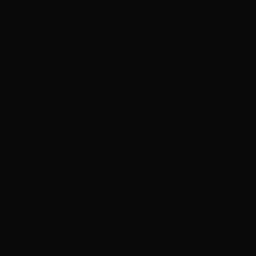

In [9]:
# this is the input pixel, almost black

input_pix = np.array([[10,]])

show(input_pix)

Prediction: [[3.63132044]], Error: 46815.40549321914


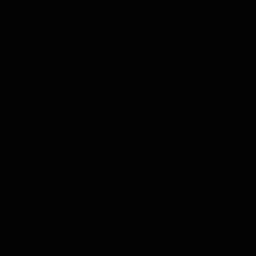

In [10]:
# let's make initial prediction. 
w_init = np.random.random()
pred = input_pix * w_init
err = ((pred - target_pix) ** 2).sum()  # square the error, so it's always positive
print("Prediction: {}, Error: {}".format(pred, err))

# it's more black that the original! Bad!
show(pred)

In [11]:
# we'll be using hot-cold method 
# change weight a little, up and down, and see which way reduces error

def learn_step(w, inp, goal, learning_rate=0.1):
    lr = learning_rate
    def get_err(w):
        return ((inp * w - goal) ** 2).sum()
    
    err = get_err(w)
    err_up = get_err(w + lr)
    err_down = get_err(w - lr)
    
    if err_up < err_down:
        w = w + lr
        err = err_up
    
    else: 
      w = w - lr
      err = err_down

    return w, inp * w, err


# let's learn! if everything is OK, error should decrease.
preds = []
w, pred, err = learn_step(w_init, input_pix, target_pix)
for i in range(220):
    w, pred, err = learn_step(w, input_pix, target_pix)
    preds.append(pred)
    print("Iteration {}. Weight: {}, Prediction: {}, Error: {}".format(i, w, pred, err))


Iteration 0. Weight: 0.5631320443047622, Prediction: [[5.63132044]], Error: 45953.93077499133
Iteration 1. Weight: 0.6631320443047621, Prediction: [[6.63132044]], Error: 45526.193415877424
Iteration 2. Weight: 0.7631320443047621, Prediction: [[7.63132044]], Error: 45100.45605676352
Iteration 3. Weight: 0.8631320443047621, Prediction: [[8.63132044]], Error: 44676.718697649616
Iteration 4. Weight: 0.9631320443047621, Prediction: [[9.63132044]], Error: 44254.98133853571
Iteration 5. Weight: 1.063132044304762, Prediction: [[10.63132044]], Error: 43835.24397942181
Iteration 6. Weight: 1.1631320443047621, Prediction: [[11.63132044]], Error: 43417.506620307904
Iteration 7. Weight: 1.2631320443047622, Prediction: [[12.63132044]], Error: 43001.769261194
Iteration 8. Weight: 1.3631320443047623, Prediction: [[13.63132044]], Error: 42588.03190208009
Iteration 9. Weight: 1.4631320443047624, Prediction: [[14.63132044]], Error: 42176.294542966185
Iteration 10. Weight: 1.5631320443047625, Prediction: 

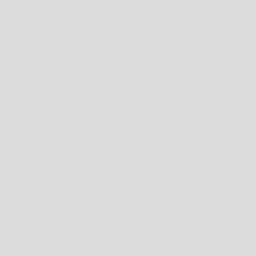

In [12]:
# let's look at our learned pixel:
show(pred)  # not bad!

In [13]:
# thats all folks!
from IPython.display import HTML

HTML("""<img src="https://i.imgur.com/tY3GksS.gif">
""")

In [14]:
# we can set the initial value of input to 1. 
# Then apply this algorithm 3 times, to determine red, green, and blue values for output pixel.
# we'll call it xy2rgb net.


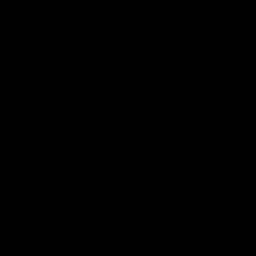

In [31]:
input = np.array([[[1, 1, 1]]])
show(input)

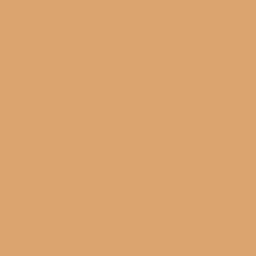

In [39]:
target = np.array([[[np.random.randint(0, 255) for _ in range(3)]]])
show(target)

In [70]:
# learning colourful pixel is like learning 3 different grayscale values
def rgb_to_gs(rgb):
    return [np.array([[rgb[0][0][i]]]) for i in range(3)]

rgb_to_gs(target)

[array([[219]]), array([[164]]), array([[111]])]

In [76]:
w

array([[111.]])

In [84]:
# we'll be optimizing by GRADIENT DESCENT
# this means, we want to change the weight by variable step, depending on how big the error is

def gradient_descent_step(w, input, target):
    pred = input * w
    err = ((pred - target) ** 2).sum()
    direction_and_amount = (pred - target) * input.sum()
    print(direction_and_amount)
    w -= direction_and_amount
    return w, err, pred

w_init = 0.5
w = [w_init for _ in range(3)]
pred = [1, 1, 1]

for _ in range(10):
    for i in range(3):
        w[i], err, pred[i] = gradient_descent_step(w[i], rgb_to_gs(input)[i], rgb_to_gs(target)[i])
        print(i, w, err, pred)    


[[-218.5]]
0 [array([[219.]]), 0.5, 0.5] 47742.25 [array([[0.5]]), 1, 1]
[[-163.5]]
1 [array([[219.]]), array([[164.]]), 0.5] 26732.25 [array([[0.5]]), array([[0.5]]), 1]
[[-110.5]]
2 [array([[219.]]), array([[164.]]), array([[111.]])] 12210.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[0.]]
0 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[0.5]]), array([[0.5]])]
[[0.]]
1 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[164.]]), array([[0.5]])]
[[0.]]
2 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[164.]]), array([[111.]])]
[[0.]]
0 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[164.]]), array([[111.]])]
[[0.]]
1 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[164.]]), array([[111.]])]
[[0.]]
2 [array([[219.]]), array([[164.]]), array([[111.]])] 0.0 [array([[219.]]), array([[164.]]), array([[111.]])]
[[0.]]


[array([[219.]]), array([[164.]]), array([[111.]])]

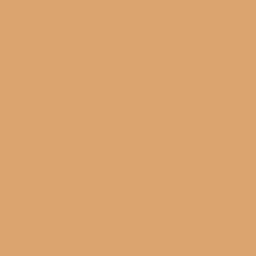

In [92]:
show(np.array([[[pred[i][0][0] for i in range(3)]]]))  # wow that converged quickly